# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2022-03-23 01:34:58.569851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-23 01:34:58.569926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# **Load MNIST Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train, x_test, y_test = x_train[:10000], y_train[:10000], x_test[:1000], y_test[:1000]

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep='\n')

(10000, 28, 28)
(10000,)
(1000, 28, 28)
(1000,)


# **Visualize Dataset**

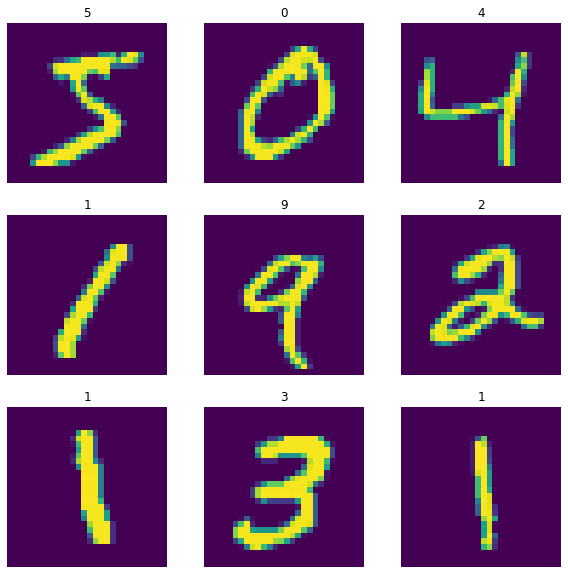

In [4]:
fig = plt.figure(figsize=(10, 10))
rows = 3
columns = 3

for i in range(rows*columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(y_train[i])

# **Feature Extraction**

In [5]:
def calculate_centriods(img, r, c):
    centroids = []
    for row in range(0, img.shape[0], r):
        for col in range(0, img.shape[1], c):
          result = sum([sum(img[row+i][col:col+c]) for i in range(r)])
          centroid = result / (r*c)
          centroids.append(centroid)
    return centroids

In [6]:
centroid_train = []
for img in x_train:
  centroid = calculate_centriods(img, 4, 4)
  centroid_train.append(centroid)


centroid_test = []
for img in x_test:
  centroid = calculate_centriods(img, 4, 4)
  centroid_test.append(centroid)

# **KNN Classifier**

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(centroid_train, y_train)

predictions = knn.predict(centroid_test)

print("Accuracy Score =", accuracy_score(y_test, predictions) * 100, "%")

Accuracy Score = 90.8 %
